In [2]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import keyboard
import matplotlib.colors as mcolors
import os
import numpy as np
import cv2
from matplotlib.pyplot import gca

In [3]:

def visual_face(frame,emotion):
    emotion_color_mappings = {"angry":"autumn","disgust":"summer","fear":"pink","happy":"spring","sad":"winter","surprise":"Wistia","neutral":"bone"}
    colormap = emotion_color_mappings[emotion]


    data = DeepFace.represent(img_path = frame)[0]["embedding"]
    min_val = min(data)
    max_val = max(data)
    # Normalize values to range [0, 1]
    normalized_data = [(val - min_val) / (max_val - min_val) for val in data]

    # Create a colormap
    colormap = plt.cm.get_cmap(colormap)

    # Create a plot with colored bars
    plt.bar(range(len(normalized_data)), [1] * len(normalized_data), color=colormap(normalized_data))
    # Set plot background to black

    plt.axis("off")
    plt.savefig("embedding_visual.jpeg", bbox_inches='tight', pad_inches=-0.23)
    # Display the plot
    plt.show()


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 22.99it/s]


dominant emotion:  neutral


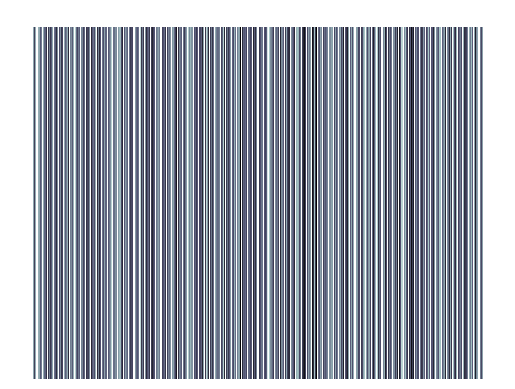

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 36.48it/s]


dominant emotion:  sad


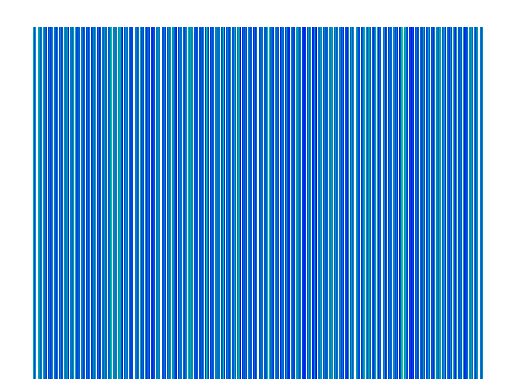

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 43.00it/s]


dominant emotion:  sad


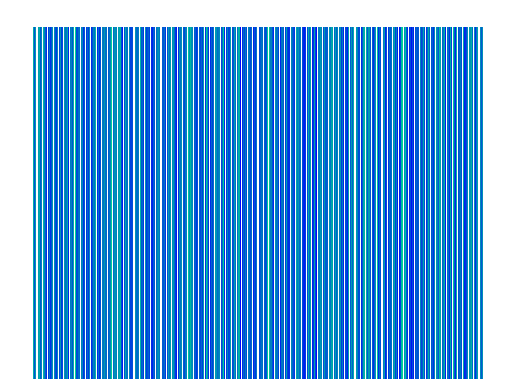

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 43.46it/s]


dominant emotion:  fear


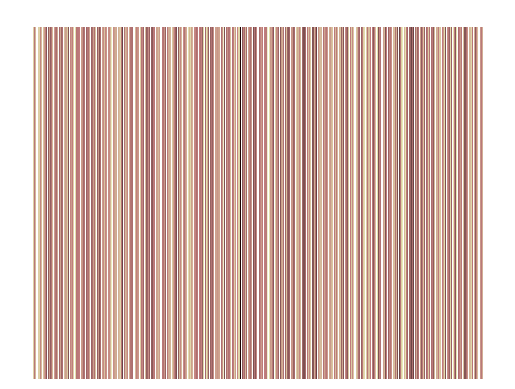

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 47.13it/s]


dominant emotion:  sad


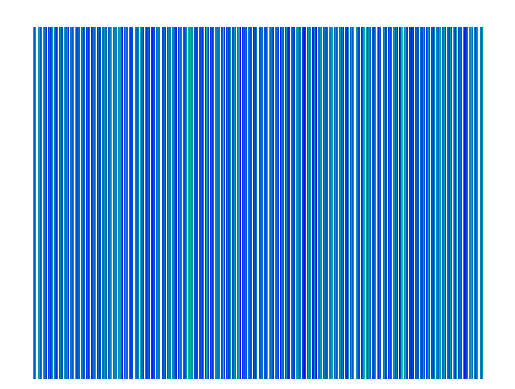

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 46.31it/s]


dominant emotion:  sad


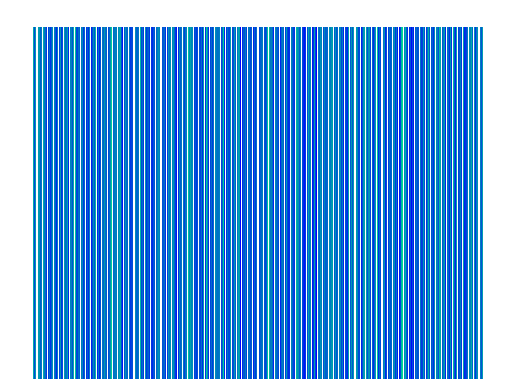

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 31.86it/s]


dominant emotion:  sad


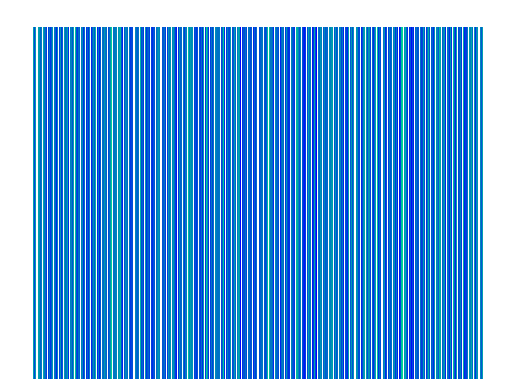

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 45.12it/s]


dominant emotion:  neutral


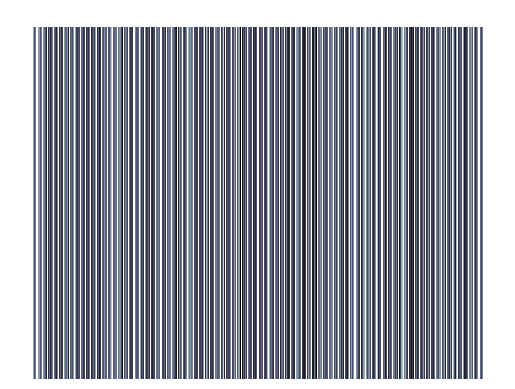

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 44.37it/s]


dominant emotion:  sad


KeyboardInterrupt: 

In [12]:
video_capture = cv2.VideoCapture(0)

if not video_capture.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    # Perform facial emotion analysis
    result = DeepFace.analyze(frame, actions=("emotion",), enforce_detection=False)

    # Get the dominant emotion
    emotion = result[0]["dominant_emotion"]
    # Check for keyboard input to break the loop


# frame_path = "/Users/sunzihang/development/affective_computing_EmpathicArt/img/Foto am 04.07.23 um 18.43.jpg"
    print("dominant emotion: ",emotion)
    visual_face(frame,emotion=emotion)
video_capture.release()

In [13]:
video_capture.release()